---
title: "Image and Keypoints augmentations"
description: "In this tutorial we leverage [`kornia.augmentation.AugmentationSequential`](https://kornia.readthedocs.io/en/latest/augmentation.container.html#kornia.augmentation.container.AugmentationSequential) to apply augmentations to image and transform reusing the applied geometric transformation to a set of associated keypoints. This is useful for detection networks or geometric problems."
author:
    - "Edgar Riba"
date: 10-14-2022
categories:
    - Intermediate
    - Keypoints
    - Data Augmentation
    - 2D
    - Augmentation container
    - Augmentation Sequential
    - kornia.augmentation
image: "../tutorials/assets/image_points_transforms.png"
---

<a href="https://colab.sandbox.google.com/github/kornia/tutorials/blob/master/nbs/image_points_transforms.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in google colab"></a>

## Install and get data

In [ ]:
%%capture
!pip install kornia
!pip install kornia-rs matplotlib

In [ ]:
import io

import requests


def download_image(url: str, filename: str = "") -> str:
    filename = url.split("/")[-1] if len(filename) == 0 else filename
    # Download
    bytesio = io.BytesIO(requests.get(url).content)
    # Save file
    with open(filename, "wb") as outfile:
        outfile.write(bytesio.getbuffer())

    return filename


download_image("https://github.com/kornia/data/raw/main/arturito.jpg")

'arturito.jpg'

In [ ]:
import kornia as K
import torch
from matplotlib import pyplot as plt

In [ ]:
img = K.io.load_image("arturito.jpg", K.io.ImageLoadType.RGB32)
img = img[None]  # 1xCxHxW / fp32 / [0, 1]
print(img.shape)

torch.Size([1, 3, 144, 256])


## Draw points and show image

<matplotlib.image.AxesImage>

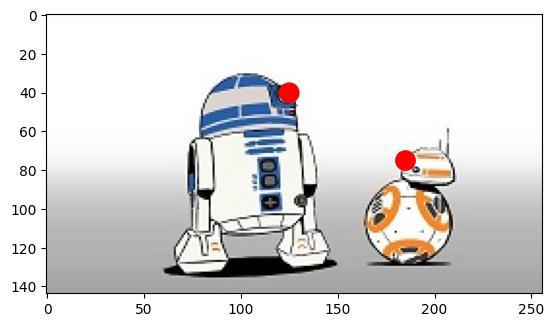

In [ ]:
coords = torch.tensor([[[125, 40.0], [185.0, 75.0]]])  # BxNx2 [x,y]

fig, ax = plt.subplots()

ax.add_patch(plt.Circle((coords[0, 0, 0], coords[0, 0, 1]), color="r"))
ax.add_patch(plt.Circle((coords[0, 1, 0], coords[0, 1, 1]), color="r"))

ax.imshow(K.tensor_to_image(img))

## Resize points and show

None


<matplotlib.image.AxesImage>

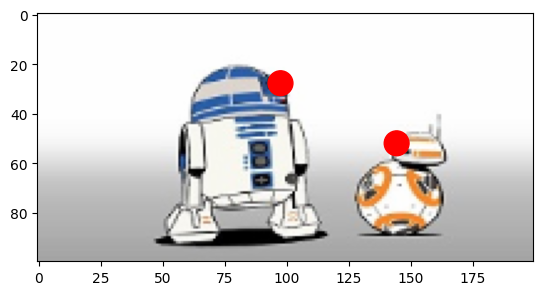

In [ ]:
resize_op = K.augmentation.AugmentationSequential(
    K.augmentation.Resize((100, 200), antialias=True), data_keys=["input", "keypoints"]
)

print(resize_op.transform_matrix)

img_resize, coords_resize = resize_op(img, coords)


fig, ax = plt.subplots()

ax.add_patch(plt.Circle((coords_resize[0, 0, 0], coords_resize[0, 0, 1]), color="r"))
ax.add_patch(plt.Circle((coords_resize[0, 1, 0], coords_resize[0, 1, 1]), color="r"))

ax.imshow(K.tensor_to_image(img_resize))

## Crop image and points

None


<matplotlib.image.AxesImage>

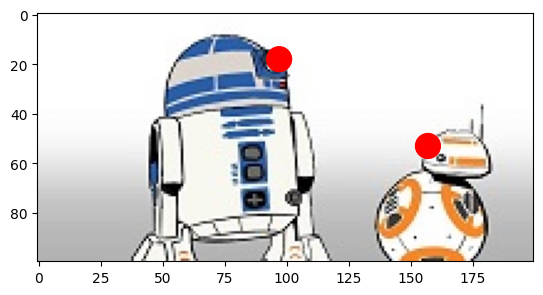

In [ ]:
crop_op = K.augmentation.AugmentationSequential(K.augmentation.CenterCrop((100, 200)), data_keys=["input", "keypoints"])
print(crop_op.transform_matrix)

img_resize, coords_resize = crop_op(img, coords)


fig, ax = plt.subplots()

ax.add_patch(plt.Circle((coords_resize[0, 0, 0], coords_resize[0, 0, 1]), color="r"))
ax.add_patch(plt.Circle((coords_resize[0, 1, 0], coords_resize[0, 1, 1]), color="r"))

ax.imshow(K.tensor_to_image(img_resize))